**FILTRO DE SPAM EN SMS**

El crecimiento en los usuarios de teléfonos celulares ha resultado en un incremento dramático de mensajes spam (no deseados) de SMS (Short Message Service). En la práctica, combatir spam en teléfonos celulares es difícil por diversos factores, como: 

- Una tasa pequeña de SMS que ha permitido a usuarios y proveedores de servicios ignorar el problema

- Disponibilidad limitada de software de filtros de spam para teléfonos celulares

Además, como los SMS son muy cortos, los filtros de spam basados en contenido pueden tener un bajo rendimiento.

En esta práctica usted debe desarrollar un detector de spam basado en aprendizaje máquina supervisado. Elegir el clasificador a desarrollar (considere la ponderación):

- K-Nearest Neighbor - 70%

- Naïve Bayes - 80%

- Perceptron Paralelo - 90%

- Regresión Logística - 100%

Se proporciona una implementación del clasificador de mínima distancia. Debe comparar el modelo del algoritmo seleccionado contra el modelo proporcionado. La comparación debe realizarla a través de la exactitud calculada para el conjunto de entrenamiento y prueba.

Para acumular en el rubro correspondiente, su algoritmo debe generar un modelo completamente funcional (no hay puntos parciales). El código del algoritmo debe ser completamente suyo, puede apoyarse de librerías para el calculo de operaciones estadísticas, matemáticas u ordenamientos. Para probar su correcto funcionamiento, su algoritmo puede ser probado con cualquier otro conjunto de datos, es decir, no debe estar atado al problema de detección de spam. En caso de duda de plagio o autoría del proyecto, se puede realizar una evaluación para revisar el dominio de la evidencia entregada.

El proyecto puede ser desarrollado en cualquier lenguaje, sin embargo, se invita al estudiante a considerar usar esta plantilla y el lenguaje de programación Python.

*Referencias*: 
- https://www.researchgate.net/profile/Jose-Gomez-Hidalgo/publication/221353226_Contributions_to_the_study_of_SMS_spam_filtering_new_collection_and_results/links/0fcfd5060c4ae6de46000000/Contributions-to-the-study-of-SMS-spam-filtering-new-collection-and-results.pdf

- https://medium.com/@oluyaled/email-spam-detection-using-machine-learning-scikit-python-1b15ee1c6f75

- https://www.kaggle.com/code/ranjitmishra/sms-spam-collection-natural-language-processing

*Dataset*: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

In [2]:
#Carga de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import minkowski
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import random

In [3]:
#Instalar (solo una vez). Son elementos necesarios para el procesamiento de los SMS
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\itzan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\itzan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
#Carga del conjunto de datos
ds = open('SMSSpamCollection','r', encoding="latin-1")
ds = ds.readlines()
df = pd.DataFrame({'label' : [] , 'class_id' : [], 'sms' : []})

for line in ds:
    row = line.split("*|*")
    df.loc[len(df.index)] = [row[0], 1 if row[0] == "spam" else 0, row[1].rstrip()]    


**Visualización de los Primeros Mensajes SMS**

In [5]:
n = 5
print(f'Mostrando los primeros {n} mensajes de un total de {df.shape[0]}:\n \n{df.head(n)}')

Mostrando los primeros 5 mensajes de un total de 5574:
 
  label  class_id                                                sms
0   ham         0  Go until jurong point, crazy.. Available only ...
1   ham         0                      Ok lar... Joking wif u oni...
2  spam         1  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham         0  U dun say so early hor... U c already then say...
4   ham         0  Nah I don't think he goes to usf, he lives aro...


**Visualización de la Distribución de Clases**

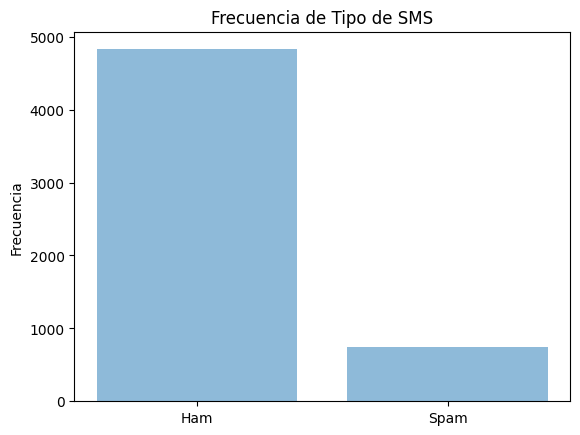

In [6]:
qty_ham = df["label"][df["label"] == "ham"].shape[0]
qty_spam = df["label"][df["label"] == "spam"].shape[0]

objects = ('Ham', 'Spam')
y_pos = np.arange(len(objects))
performance = [qty_ham, qty_spam]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Tipo de SMS')
plt.show()

**Visualización de WordCloud**

Wordcloud o nube de palabras es una herramienta de visualización útil para tener una estimación de las palabras que tienen la más alta frecuencia en los mensajes SMS. Generalmente, a más frecuencia tenga una palabra en los mensajes, más grande aparecera en la nube de palabras.

*Referencia*:
- https://www.datacamp.com/tutorial/wordcloud-python


In [7]:
mask = np.array(Image.open("cloud.png"))
mask[mask == 1] = 255


def generar_wordcloud(text):
    wordcloud = WordCloud(background_color = "white", stopwords = STOPWORDS, max_words = 100, mask = mask).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

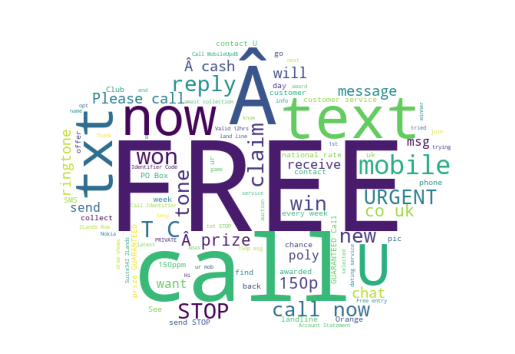

In [8]:
lbl_spam = df["sms"][df["label"] == "spam"]
lbl_spam = ' '.join(lbl_spam)

generar_wordcloud(lbl_spam)

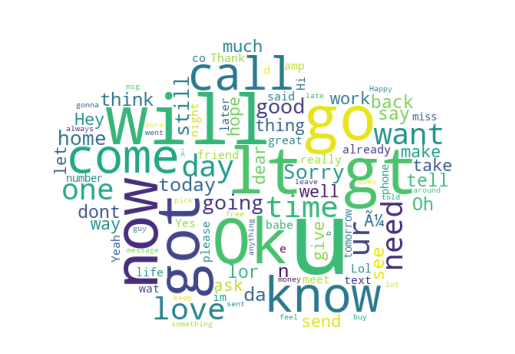

In [9]:
lbl_ham = df["sms"][df["label"] == "ham"]
lbl_ham = ' '.join(lbl_ham)

generar_wordcloud(lbl_ham)

**Procesamiento de los Mensajes SMS**

In [10]:
def procesar_sms(txt):
    """
    Lleva a cabo las siguientes operaciones en una cadena de caracteres en un texto:
    1. Remueve los símbolos de puntuación
    2. Remueve las palabras comúnes en un lenguaje (inglés en este caso, como: a, the, is, etc.)
    3. Regresa una lista de texto límpio
    """
    # Busca caracteres de puntación
    nopunc = [char for char in txt if char not in string.punctuation]

    # Une los caracteres como cadenas de caracteres
    nopunc = ''.join(nopunc)
    
    # Remueve palabras comunes en el lenguaje
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]


In [11]:
df["sms"] = df["sms"].apply(procesar_sms)
print("Mensajes limpios como lista")
print(df.head(3))
df["sms"] = df["sms"].apply(lambda x: " ".join(x)) 
print("\n\nMensajes limpios como texto")
print(df.head(3))

Mensajes limpios como lista
  label  class_id                                                sms
0   ham         0  [Go, jurong, point, crazy, Available, bugis, n...
1   ham         0                     [Ok, lar, Joking, wif, u, oni]
2  spam         1  [Free, entry, 2, wkly, comp, win, FA, Cup, fin...


Mensajes limpios como texto
  label  class_id                                                sms
0   ham         0  Go jurong point crazy Available bugis n great ...
1   ham         0                            Ok lar Joking wif u oni
2  spam         1  Free entry 2 wkly comp win FA Cup final tkts 2...


**Extracción de Características**

En esta parte se convertirá los datos de texto en características numéricas. Esto se hace a través de Count Vectorization.

*Referencia*:
- https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [12]:
#Extraccion de caracteristicas
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df["sms"]) #Regresa una matriz dispersa
X = np.asarray(X.todense()) #Regresa una matriz densa para poder ser usada por clasificadores como los que se solicitan.

In [13]:
print(f'El conjunto de datos está descrito por {X.shape[1]} características\n')

print(f'Mensaje SMS: {df["label"][0]}\n {df["sms"][0]}\n Caracterización: \n {X[0]}')

El conjunto de datos está descrito por 9455 características

Mensaje SMS: ham
 Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
 Caracterización: 
 [0 0 0 ... 0 0 0]


**Código del Clasificador Mínima Distancia**

In [14]:
class Minima_Distancia:

    def __init__(self,orden_metrica = 2) -> None:
        self.orden_metrica = orden_metrica
        self.centroides = None
        self.n_clases = None

    def entrenar(self, X_tr, y_tr):
        self.n_clases = len(np.unique(y_tr))
        print(self.n_clases)
        dimension = np.shape(X_tr)[1]        

        self.centroides = np.zeros(shape=(self.n_clases , dimension))
        

        for i in range(self.n_clases):
            self.centroides[i] = np.mean(X_tr[y_tr==i], axis=0)
            
    def predecir(self, X):        
        distancias = np.zeros(shape = (np.shape(X)[0], self.n_clases))

        for i, x in enumerate(X):
            for j, c in enumerate(self.centroides):
                distancias[i,j] = minkowski(x, c, self.orden_metrica)        

        return np.argmin(distancias, axis=1)

In [15]:
class KNN:

    def __init__(self, k_neigh = 5, orden_metrica = 2) -> None:
        self.orden_metrica = orden_metrica
        self.k_neigh = k_neigh
        self.n_clases = None
        self.clases = None

    def entrenar(self, X_tr, y_tr):
        self.X_tr = X_tr
        self.Y_tr = y_tr
        self.n_clases = len(np.unique(y_tr))
        self.clases = np.unique(y_tr)
        #dimension = np.shape(X_tr)[1]        
        #self.centroides = np.zeros(shape=(self.n_clases , dimension))
        #for i in range(self.n_clases):
        #    self.centroides[i] = np.mean(X_tr[y_tr==i], axis=0)
            
    def predecir(self, X):        
        #distancias = np.zeros(shape = (np.shape(X)[0], self.n_clases))
        Y_tags = np.zeros(len(X))
        for i in range(len(X)):
            distancias = []
            for j in range(len(self.X_tr)):
                distancias.append([minkowski(X[i], self.X_tr[j], self.orden_metrica), self.Y_tr[j]])
            
            kneighb = sorted(distancias)[:self.k_neigh]
            count = np.zeros(self.n_clases)
            for neigh in kneighb:
                for z in range(self.n_clases):
                    if neigh[1] == self.clases[z]:
                        count[z] += 1
            Y_tags[i] = float(self.clases[np.array(count).argmax()])
        return Y_tags

**Código del Clasificador Regresion Logistica**

In [27]:
#Regresion Logistica

class RegresionLogistica:
    
    def __init__(self, epoch = 1000, alfa = 0.5):
        self.w = None
        self.w_hist = None
        self.loss_hist = None
        self.b = None
        self.epoch = epoch
        self.alfa = alfa
        self.loss = []
        
    def train(self, X_tr, Y_tr):
        self.X_tr = X_tr
        self.Y_tr = Y_tr
        self.dim = X_tr.shape[1]
        self.w = np.random.rand(self.dim)
        self.b = np.random.random()
        self.w_hist = self.w
        self.loss_hist = self.__loss()
        tmp_w = np.zeros(self.dim)
        for i in range(self.epoch):
            '''f_x = []
            for j in range(len(self.X_tr)):
                f_x.append(self.__sigmoide(self.__z(self.X_tr[i])) - self.Y_tr[i])'''
            f_x = np.array(list(map(self.__sigmoide, np.array(list(map(self.__z, X_tr))))))
            #print("sigmoide:")
            #print(f_x)
            dif = np.subtract(f_x, self.Y_tr)
            #print("pred:")
            #print(dif)
            for j in range(self.dim):
                prod = np.multiply(dif, X_tr[:,j])
                deriv = np.sum(prod)/len(X_tr)
                tmp_w[j] = self.w[j] - self.alfa*deriv
            self.w = tmp_w
            #print(self.__loss())
            #print("w:")
            #print(self.w)
            tmp_loss = self.__loss()
            #print(f'Perdida actual {tmp_loss}, mejor historica {self.loss_hist}')
            # print(f'Peso actual {self.w}, mejor historica {self.w_hist}')            
            if tmp_loss < self.loss_hist:
              self.w_hist = self.w
              self.loss_hist = tmp_loss
              #print("Hubo un cambio")

            self.loss.append([i, tmp_loss])
            

    def __z(self, x):
        return np.dot(self.w, x) + self.b
        
    def __sigmoide(self, z):
        return 1/(1 + np.exp(-z))
    
    def __loss(self):
        suma = 0
        for i in range(len(self.X_tr)):
            f_i = self.__sigmoide(self.__z(self.X_tr[i]))                       # f_i = sigmoide(w*x + b)
            if self.Y_tr[i] == 0:
                suma -= np.log(f_i)
            elif self.Y_tr[i] == 1:
                suma -= np.log(1 - f_i)
            # suma += - self.Y_tr[i] * np.log(f_i) - (1 - self.Y_tr[i]) * np.log(1 - f_i)        
        return suma/len(X_tr)
    
    def tr_loss(self):
        return self.loss
        
    def predict(self, X_ts):
        Y_pred = np.zeros(len(X_ts))
        for i in range(len(X_ts)):
            if self.__sigmoide(self.__z(X_ts[i])) >= 0.5:
                Y_pred[i] = 1
        return Y_pred
    
    def predict_hist(self, X_ts):
        Y_pred = np.zeros(len(X_ts))
        for i in range(len(X_ts)):
            if self.__sigmoide(np.dot(self.w_hist, X_ts[i]) + self.b) >= 0.5:
                Y_pred[i] = 1
        return Y_pred

    def accuracy(self, X_ts, Y_ts):
        Y_pred = self.predict(X_ts)
        suma = 0
        Y_test = Y_ts
        for i in range(len(Y_test)):
            if Y_test[i] == Y_pred[i]:
                suma += 1
        return suma/len(Y_test)

In [23]:
#Regresion Logistica

class RegresionLogistica_conCeros:
    
    def __init__(self, epoch = 300, alfa = 0.5):
        self.w = None
        self.w_hist = None
        self.loss_hist = None
        self.b = None
        self.epoch = epoch
        self.alfa = alfa
        self.loss = []
        
    def train(self, X_tr, Y_tr):
        self.X_tr = X_tr
        self.Y_tr = Y_tr
        self.dim = X_tr.shape[1]
        self.w = np.zeros(self.dim)
        self.b = 0
        self.w_hist = self.w
        self.loss_hist = self.__loss()
        tmp_w = np.zeros(self.dim)
        for i in range(self.epoch):
            '''f_x = []
            for j in range(len(self.X_tr)):
                f_x.append(self.__sigmoide(self.__z(self.X_tr[i])) - self.Y_tr[i])'''
            f_x = np.array(list(map(self.__sigmoide, np.array(list(map(self.__z, X_tr))))))
            #print("sigmoide:")
            #print(f_x)
            dif = np.subtract(f_x, self.Y_tr)
            #print("pred:")
            #print(dif)
            for j in range(self.dim):
                prod = np.multiply(dif, X_tr[:,j])
                deriv = np.sum(prod)/len(X_tr)
                tmp_w[j] = self.w[j] - self.alfa*deriv
            self.w = tmp_w
            #print(self.__loss())
            #print("w:")
            #print(self.w)
            tmp_loss = self.__loss()
            #print(f'Perdida actual {tmp_loss}, mejor historica {self.loss_hist}')
            # print(f'Peso actual {self.w}, mejor historica {self.w_hist}')            
            if tmp_loss < self.loss_hist:
              self.w_hist = self.w
              self.loss_hist = tmp_loss
              #print("Hubo un cambio")

            self.loss.append([i, tmp_loss])
            

    def __z(self, x):
        return np.dot(self.w, x) + self.b
        
    def __sigmoide(self, z):
        return 1/(1 + np.exp(-z))
    
    def __loss(self):
        suma = 0
        for i in range(len(self.X_tr)):
            f_i = self.__sigmoide(self.__z(self.X_tr[i]))                       # f_i = sigmoide(w*x + b)
            if self.Y_tr[i] == 0:
                suma -= np.log(f_i)
            elif self.Y_tr[i] == 1:
                suma -= np.log(1 - f_i)
            # suma += - self.Y_tr[i] * np.log(f_i) - (1 - self.Y_tr[i]) * np.log(1 - f_i)        
        return suma/len(X_tr)
    
    def tr_loss(self):
        return self.loss
        
    def predict(self, X_ts):
        Y_pred = np.zeros(len(X_ts))
        for i in range(len(X_ts)):
            if self.__sigmoide(self.__z(X_ts[i])) >= 0.5:
                Y_pred[i] = 1
        return Y_pred
    
    def predict_hist(self, X_ts):
        Y_pred = np.zeros(len(X_ts))
        for i in range(len(X_ts)):
            if self.__sigmoide(np.dot(self.w_hist, X_ts[i]) + self.b) >= 0.5:
                Y_pred[i] = 1
        return Y_pred

    def accuracy(self, X_ts, Y_ts):
        Y_pred = self.predict(X_ts)
        suma = 0
        Y_test = Y_ts
        for i in range(len(Y_test)):
            if Y_test[i] == Y_pred[i]:
                suma += 1
        return suma/len(Y_test)

**Creación y Prueba de los Modelos como Detectores de SPAM**
KNN con n = 5

In [17]:
Y = []
for i in range(len(X)):
    if df["class_id"][i] == 0:
        Y.append(0)
    else:
        Y.append(1)

X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.2, stratify=df["class_id"])
# KNN

knn = KNN(orden_metrica=1)
knn.entrenar(X_tr, y_tr)

print("Exactitud del Clasificador de KNN")
y_hat = knn.predecir(X_tr)
accuracy = accuracy_score(y_tr, y_hat)
print(f'Entrenamiento: {accuracy}')
y_hat = knn.predecir(X_te)
accuracy = accuracy_score(y_te, y_hat)
print(f'Prueba: {accuracy}')

Exactitud del Clasificador de KNN
Entrenamiento: 0.9246467817896389
Prueba: 0.9013452914798207


**Creación y Prueba de los Modelos como Detectores de SPAM**
Regresion Logistica con los pesos en random en 300 iteraciones

Exactitud del Regresor Logistico entrenemiento
0.6994841892801077
Exactitud del Regresor Logistico validacion
0.7085201793721974
Mejor historico
Exactitud del Regresor Logistico entrenemiento
0.6994841892801077
Exactitud del Regresor Logistico validacion
0.7085201793721974


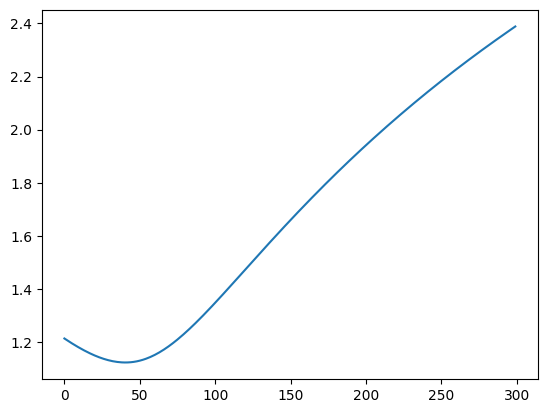

'\n#Evaluación del desempeño del clasificador de mínima distancia\nprint("Exactitud del Clasificador de Mínima Distancia")\ny_hat = cmd.predecir(X_tr)\naccuracy = accuracy_score(y_tr, y_hat)\nprint(f\'Entrenamiento: {accuracy}\')\ny_hat = cmd.predecir(X_te)\naccuracy = accuracy_score(y_te, y_hat)\nprint(f\'Prueba: {accuracy}\')\n\n#Evaluación del desempeño del clasificador implementado por estudiante\n#TODO'

In [25]:
#División del conjunto de datos en conjuntos de entrenamiento y prueba (estratificados por la etiqueta de clase)

#Instancia y entrenamiento de clasificador implementado por estudiante
#TODO

reg = RegresionLogistica(300, 0.5)
reg.train(X_tr, y_tr)
print("Exactitud del Regresor Logistico entrenemiento")
Y_pred = reg.predict(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te = reg.predict(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

print("Mejor historico")

print("Exactitud del Regresor Logistico entrenemiento")
Y_pred_hist = reg.predict_hist(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te_hist = reg.predict_hist(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

loss = reg.tr_loss()

# print(loss)

x_axis = np.zeros(len(loss))
y_axis = np.zeros(len(loss))

for i in range(len(loss)):
    x_axis[i] = loss[i][0]
    y_axis[i] = loss[i][1]

plt.plot(x_axis, y_axis)
plt.show()

'''
#Evaluación del desempeño del clasificador de mínima distancia
print("Exactitud del Clasificador de Mínima Distancia")
y_hat = cmd.predecir(X_tr)
accuracy = accuracy_score(y_tr, y_hat)
print(f'Entrenamiento: {accuracy}')
y_hat = cmd.predecir(X_te)
accuracy = accuracy_score(y_te, y_hat)
print(f'Prueba: {accuracy}')

#Evaluación del desempeño del clasificador implementado por estudiante
#TODO'''

**Creación y Prueba de los Modelos como Detectores de SPAM**
Regresion Logistica inicializada con los pesos en random y 1000 epocas

Exactitud del Regresor Logistico entrenemiento
0.8441354563803544
Exactitud del Regresor Logistico validacion
0.8385650224215246
Mejor historico
Exactitud del Regresor Logistico entrenemiento
0.8441354563803544
Exactitud del Regresor Logistico validacion
0.8385650224215246


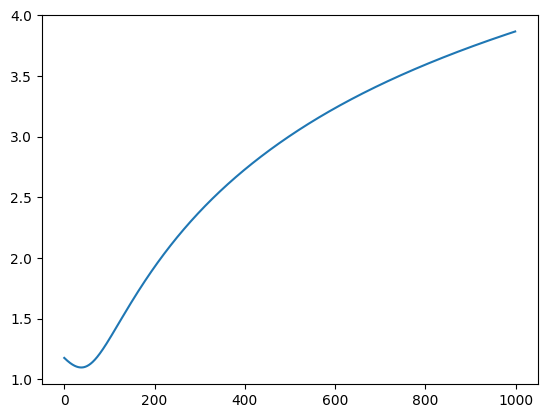

In [28]:
reg = RegresionLogistica()
reg.train(X_tr, y_tr)
print("Exactitud del Regresor Logistico entrenemiento")
Y_pred = reg.predict(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te = reg.predict(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

print("Mejor historico")

print("Exactitud del Regresor Logistico entrenemiento")
Y_pred_hist = reg.predict_hist(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te_hist = reg.predict_hist(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

loss = reg.tr_loss()

# print(loss)

x_axis = np.zeros(len(loss))
y_axis = np.zeros(len(loss))

for i in range(len(loss)):
    x_axis[i] = loss[i][0]
    y_axis[i] = loss[i][1]

plt.plot(x_axis, y_axis)
plt.show()

**Creación y Prueba de los Modelos como Detectores de SPAM**
Regresion Logistica inicializada con los pesos en 0 en 300 iteraciones

Exactitud del Regresor Logistico entrenemiento
0.9717425431711146
Exactitud del Regresor Logistico validacion
0.947085201793722
Mejor historico
Exactitud del Regresor Logistico entrenemiento
0.9717425431711146
Exactitud del Regresor Logistico validacion
0.947085201793722


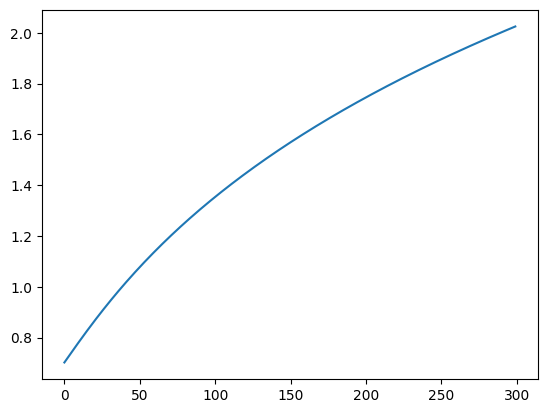

In [24]:
regC = RegresionLogistica_conCeros()
regC.train(X_tr, y_tr)
print("Exactitud del Regresor Logistico entrenemiento")
Y_pred = regC.predict(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te = regC.predict(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

print("Mejor historico")

print("Exactitud del Regresor Logistico entrenemiento")
Y_pred_hist = regC.predict_hist(X_tr)
y_hat = accuracy_score(Y_pred, y_tr)
print(y_hat)

print("Exactitud del Regresor Logistico validacion")
Y_pred_te_hist = regC.predict_hist(X_te)
y_hat = accuracy_score(Y_pred_te, y_te)
print(y_hat)

lossC = regC.tr_loss()

# print(loss)

x_axis = np.zeros(len(lossC))
y_axis = np.zeros(len(lossC))

for i in range(len(lossC)):
    x_axis[i] = lossC[i][0]
    y_axis[i] = lossC[i][1]

plt.plot(x_axis, y_axis)
plt.show()